# Week3 - Homework

Write a rule based predictor for the dataset below.

Choose one of the following datasets and do your EDA.
Test your assumptions.

Finally write your code in `predict_one` function.

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'
#in_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/in_names.csv'

df = pd.read_csv(us_names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    27999 non-null  object
 1   gender  27999 non-null  object
dtypes: object(2)
memory usage: 656.2+ KB


In [24]:
df.head(400)

,name,gender
0,jerilynn,F
1,percy,M
2,landry,M
3,reynalda,F
4,girl,F
...,...,...
395,blessing,M
396,kevonte,M
397,azhar,F
398,tramika,F


In [2]:
df.gender.value_counts()

M    14000
F    13999
Name: gender, dtype: int64

### Two examples:

In [3]:
df['is_last_letter_vowel'] = [ 'aeiou'.find(name[-1])>0 for name in df.name]

<Axes: xlabel='is_last_letter_vowel', ylabel='count'>

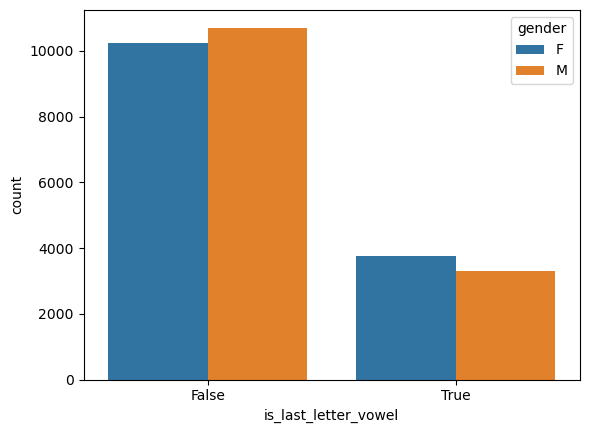

In [4]:
import seaborn as sns

sns.countplot(data = df, x = 'is_last_letter_vowel', hue = 'gender')

It looks like last letter is being a vowel is not a good indicator for this dataset!

<Axes: xlabel='len', ylabel='count'>

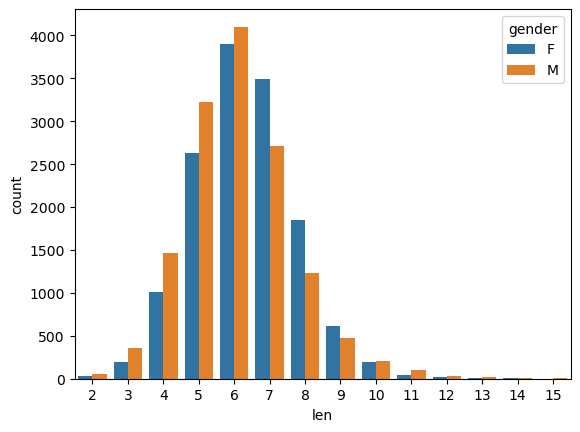

In [5]:
df['len'] = [ len(name) for name in df.name]
sns.countplot(data = df, x = 'len', hue = 'gender')

Seems like length doesn't also seem like a good separator

In [52]:
def predict_one(name): # DON'T CHANGE THIS LINE
    # your code
    if ( len(name)>4 and name[-1] in  ['a', 'e' ,'i','y','h'] ):
        return 'F'
    else:
        return 'M'
# Examples
example1=(predict_one('inge'))
example2=(predict_one('shalise'))
print(example1,example2)
   


M F


In [53]:
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.73231186828101
